In [14]:
##################################################
## Project: DGRPool
## Script purpose: Stats over GWAS computation
## Version: 1.0.0
## Date Created: 2023 Mar 24
## Date Modified: 2023 Mar 26
## Author: Vincent Gardeux (vincent.gardeux@epfl.ch)
##################################################

import fitz  # PyMuPDF
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

In [34]:
# Open the PDF file
pdf_path = '/home/gardeux/Figure4D.pdf'
document = fitz.open(pdf_path)

# Extract the first page
page = document.load_page(0)

# Extract paths (vector graphics) from the page
paths = page.get_drawings()

# Collect point coordinates from paths
points = []

# Iterate through the paths to find the points
for path in paths:
    for item in path["items"]:
        if item[0] == "c":  # Cubic Bezier curve
            # Each 'c' item is a cubic Bezier curve
            # Extract the control points and end point
            points.append(item[1])  # Control point 1 (x1, y1)
            points.append(item[2])  # Control point 2 (x2, y2)
            points.append(item[3])  # End point (x3, y3)

# Convert to DataFrame
df_points = pd.DataFrame(points, columns=['x', 'y'])
df_points

ValueError: Shape of passed values is (477606, 1), indices imply (477606, 2)

In [33]:
paths

[{'items': [('re', Rect(0.0, 0.0, 504.0, 504.0), -1)],
  'type': 'f',
  'even_odd': False,
  'fill_opacity': 1.0,
  'fill': (1.0, 1.0, 1.0),
  'rect': Rect(0.0, 0.0, 504.0, 504.0),
  'seqno': 0,
  'layer': '',
  'closePath': None,
  'color': None,
  'width': None,
  'lineCap': None,
  'lineJoin': None,
  'dashes': None,
  'stroke_opacity': None},
 {'items': [('l',
    Point(75.59400177001953, 430.5589904785156),
    Point(473.7619934082031, 430.5589904785156))],
  'type': 's',
  'stroke_opacity': 1.0,
  'color': (0.0, 0.0, 0.0),
  'width': 1.0,
  'lineCap': (1, 1, 1),
  'lineJoin': 1.0,
  'closePath': False,
  'dashes': '[] 0',
  'rect': Rect(75.59400177001953, 430.5589904785156, 473.7619934082031, 430.5589904785156),
  'layer': '',
  'seqno': 2,
  'fill': None,
  'fill_opacity': None,
  'even_odd': None},
 {'items': [('l',
    Point(75.59400177001953, 430.5589904785156),
    Point(75.59400177001953, 437.7619934082031))],
  'type': 's',
  'stroke_opacity': 1.0,
  'color': (0.0, 0.0, 0.

In [22]:
page


page 0 of /home/gardeux/Figure4D.pdf

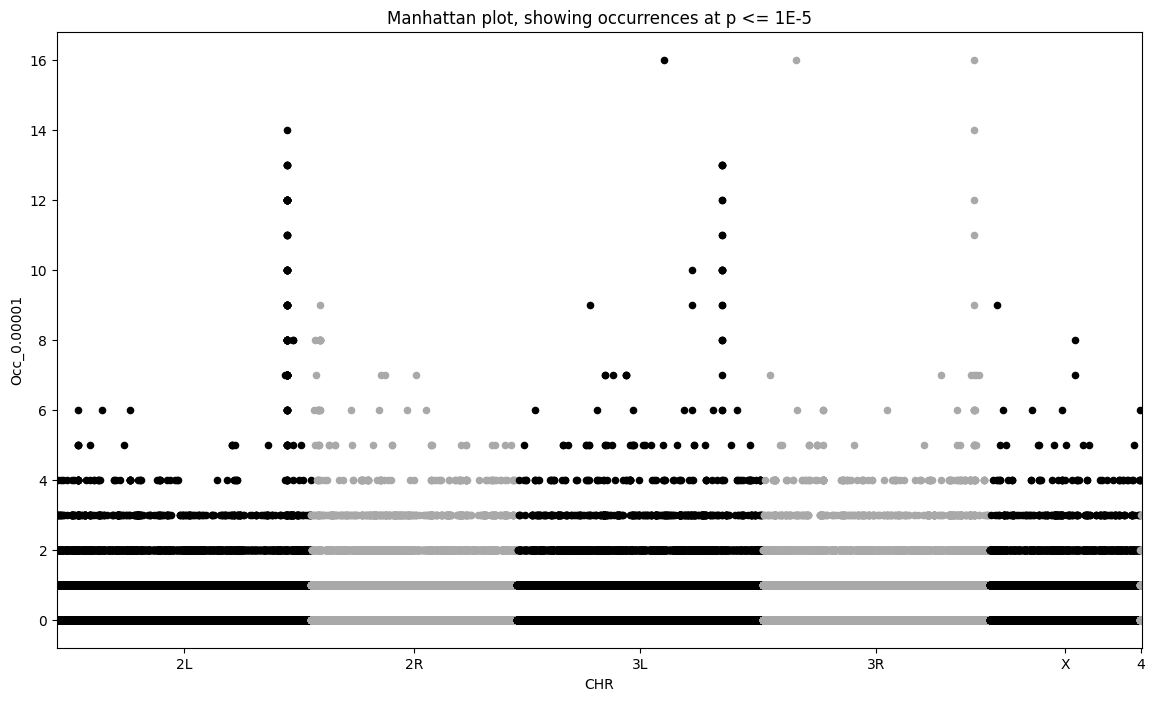

In [49]:
## Manhattan plot using Matplotlib. Ref = https://www.python-graph-gallery.com/manhattan-plot-with-matplotlib

# Format chromosomes
data_distrib.CHR = data_distrib.CHR.astype('category')
data_distrib.CHR = data_distrib.CHR.cat.set_categories(["2L", "2R", "3L", "3R", "X", "4"], ordered=True)
data_distrib = data_distrib.sort_values('CHR')

# How to plot gene vs. value and colour it by chromosome?
data_distrib['ind'] = range(len(data_distrib)) # Simply plot by index
data_distrib_grouped = data_distrib.groupby(('CHR'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['black','darkgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(data_distrib_grouped):
    group.plot(kind='scatter', x='ind', y=col_name,color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(data_distrib)])

# x axis label
ax.set_xlabel('CHR')

# Title
plt.title('Manhattan plot, showing occurrences at p <= 1E-5')

plt.show()